# Libraries

## Numpy

Numpy and the numpy linalg library can be used to represent vectors, matrices and do linear algebra operations.

In [1]:
import numpy as np

We can easily define vectors and matrices:

In [2]:
v = np.array([1, 3])

In [3]:
v

array([1, 3])

In [4]:
M = np.array([
    [1, 2],
    [3, 4]
])

In [5]:
M

array([[1, 2],
       [3, 4]])

We can access elements of an existing matrix like this:

In [6]:
M[0,1]

2

Shape of a matrix:

In [7]:
M.shape

(2, 2)

Matrix / vector products:

In [8]:
M.dot(M)

array([[ 7, 10],
       [15, 22]])

In [9]:
M.dot(v)

array([ 7, 15])

In [10]:
v.dot(v)

10

Transpose:

In [11]:
M.transpose()

array([[1, 3],
       [2, 4]])

Inverse:

In [12]:
np.linalg.inv(M)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Many other operations can be done. Use the documentation if needed: https://numpy.org/doc/

Or more generally, simply use Google / Stackoverflow.

## Matplotlib

Matplotlib is very convenient to plot figures with Python or in a Jupyter Notebook.

In [13]:
import matplotlib.pyplot as plt
# This line is necessary to use matplotlib in a Jupyter Notebook:
%matplotlib inline

In [14]:
# We can use numpy to generate data
X = np.arange(0, 10, 0.5) # generate points spaced by 0.5 from 0 to 10 (excluded)
Y = np.sin(X)

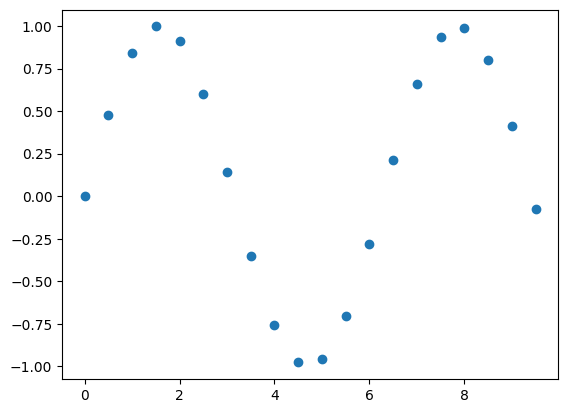

In [15]:
plt.scatter(X, Y)

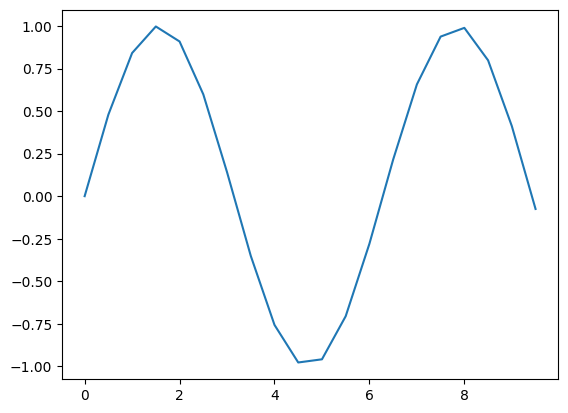

In [16]:
plt.plot(X, Y)
plt.show()

We can also generate random points

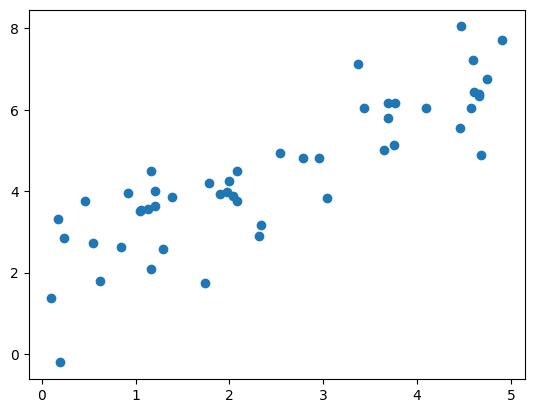

In [17]:
X = np.random.uniform(0,5,size=50) # 50 numbers uniformly sampled in [0,5]
noise = np.random.normal(2,1,size=50) # 50 numbers sampled from a normal distribution with mean 2 and standard deviation 1
Y = X + noise
plt.scatter(X, Y)

If you run several times the two cells above, you will notice that new points are generated every time. If we want to generate random numbers but still be able to reproduce the results, we can use a *seed*

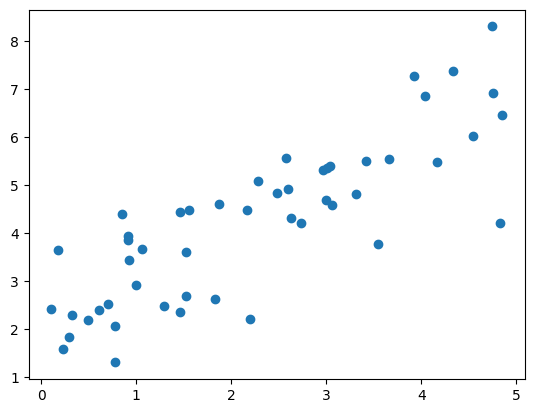

In [18]:
np.random.seed(42)
X = np.random.uniform(0,5,size=50) # 50 numbers uniformly sampled in [0,5]
noise = np.random.normal(2,1,size=50) # 50 numbers sampled from a normal distribution with mean 2 and standard deviation 1
Y = X + noise
plt.scatter(X, Y)

Now if you run the cell above several times but keep the same seed (42), the generated points stay the same. You can use another seed if you want to generate different points.

# Under and overfitting

Let's define a "ground-truth" function f(x) = x * sin(x), and plot it on [0,10]

In [19]:
def f(x):
    return np.sin(x) / x

In [20]:
X_f = np.arange(1,10,0.1)
Y_f = f(X_f)

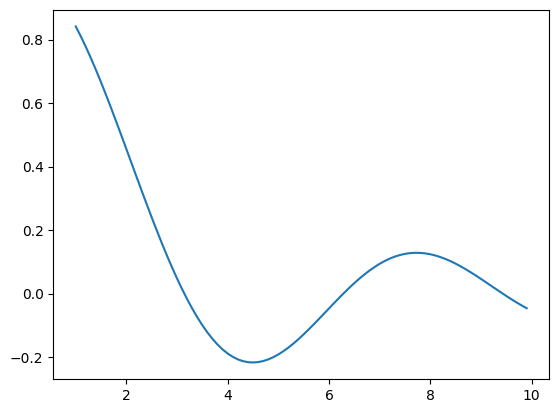

In [21]:
plt.plot(X_f,Y_f)
plt.show()

Let's randomly sample N points from this function, and create corresponding labels while adding some random noise.

In [22]:
np.random.seed(42)
N = 12
points = np.random.uniform(1, 10, size=N)
#points = np.arange(1,10,0.5)
noise = np.random.randn(N)
labels = f(points) + 0.1 * noise

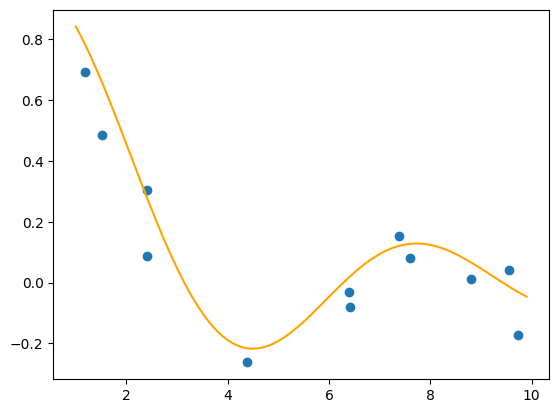

In [23]:
plt.plot(X_f,Y_f,color='orange')
plt.scatter(points, labels)
plt.show()

We will now assume we do not know the ground truth function. We will instead use the sampled points as training examples to try to predict the corresponding labels, and try to fit a polynomial curve.

For now, we will use all the points as training examples.

In [24]:
# You do not need to understand what is inside this function for now, only what it does

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_polynomial_coefficients(points, labels, degree=3):
    """Return the coefficients of the d-degree polynomial which best matches
    the curve represented by (points, labels)"""
    polyfeatures = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    points_poly = polyfeatures.fit_transform(points.reshape(-1,1))
    lr.fit(points_poly, labels)
    return lr.coef_

You can use the Polynomial class from numpy if you want:

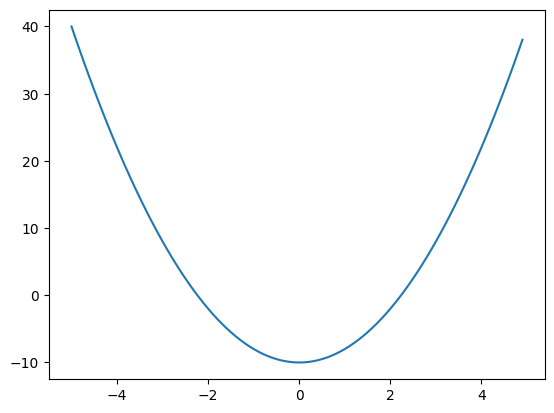

In [25]:
from numpy.polynomial.polynomial import Polynomial
poly = Polynomial([-10,0,2]) # represents function f(x) = 2*x^2 - 10
X = np.arange(-5, 5, 0.1)
Y = poly(X)
plt.plot(X, Y)
plt.show()

**Try to fit polynomials of varying degrees to the training points and labels, and show the resulting plot**

Example with a polynomial of degree "super 0", i.e. the function f(x) = 0:

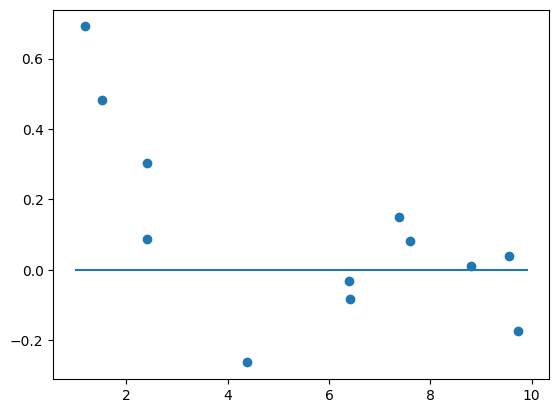

In [26]:
predictions = 0 * X_f
plt.plot(X_f,predictions)
plt.scatter(points, labels)
plt.show()

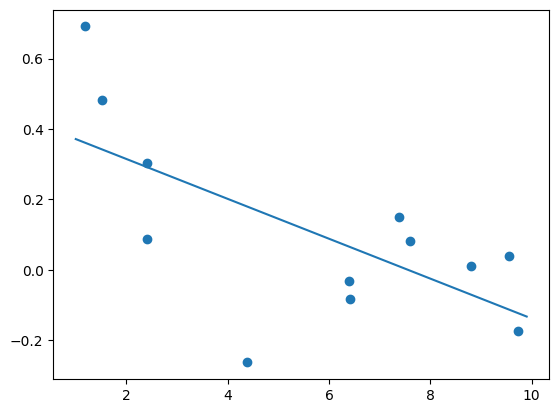

In [27]:
# Polynomial of degree 1
poly_coefs = get_polynomial_coefficients(points, labels, degree=1)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

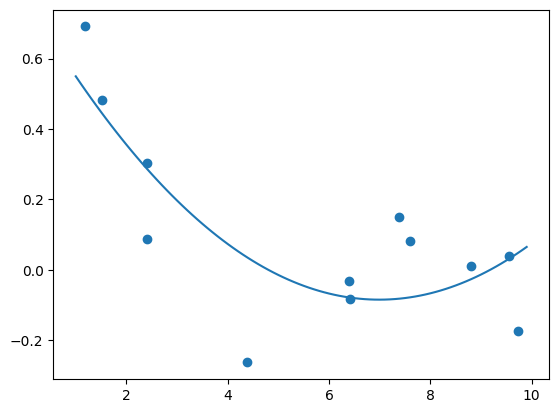

In [28]:
# Polynomial of degree 2
poly_coefs = get_polynomial_coefficients(points, labels, degree=2)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

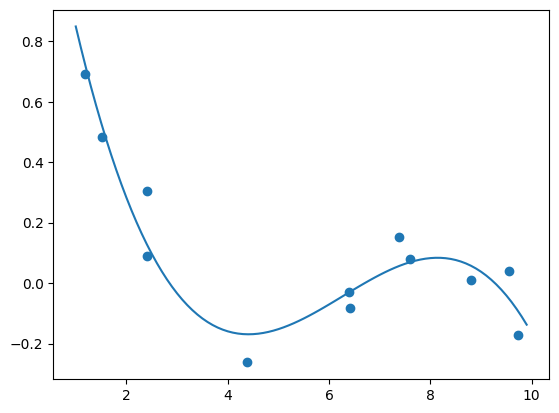

In [29]:
# Polynomial of degree 3
poly_coefs = get_polynomial_coefficients(points, labels, degree=3)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

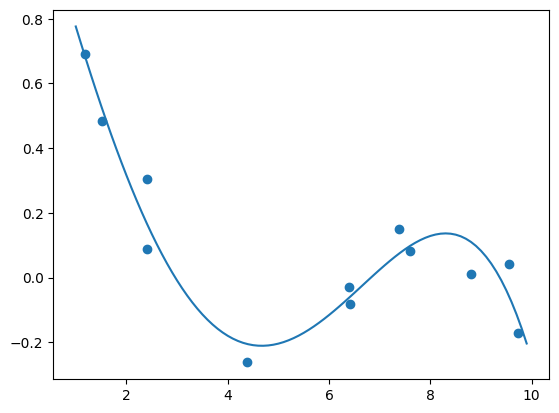

In [30]:
# Polynomial of degree 4
poly_coefs = get_polynomial_coefficients(points, labels, degree=4)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()


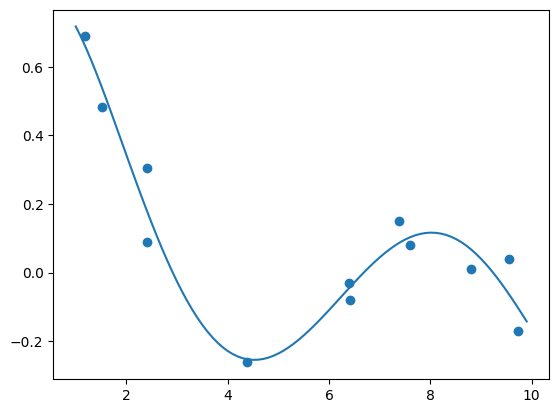

In [31]:
# Polynomial of degree 5
poly_coefs = get_polynomial_coefficients(points, labels, degree=5)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

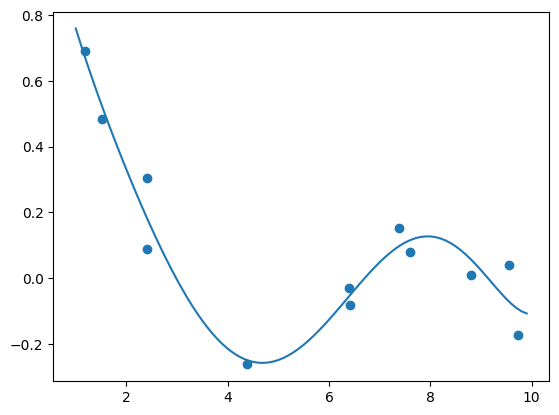

In [32]:
# Polynomial of degree 6
poly_coefs = get_polynomial_coefficients(points, labels, degree=6)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

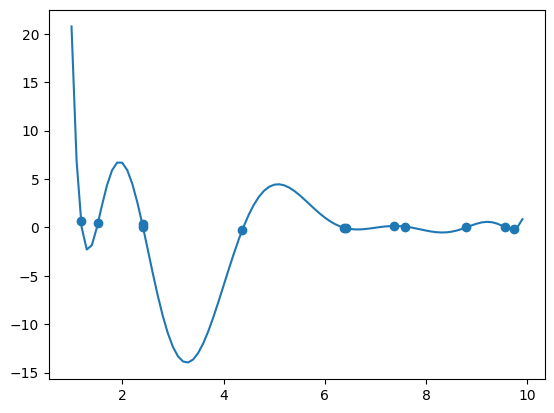

In [33]:
# Polynomial of degree 10
poly_coefs = get_polynomial_coefficients(points, labels, degree=10)
poly = Polynomial(poly_coefs)
predictions = poly(X_f)
plt.plot(X_f, predictions)
plt.scatter(points, labels)
plt.show()

**Which degree seem to yield the lowest training error?**

**Which degree seem to intuitively be the most relevant match?**

*Lowest training error: degree 10.*

*Most relevant match: degrees 3 to 5.*

**Compute the training error using the least square loss for polynomials of different degrees (for instance 2, 3, 5, 10, 15...). Does this match your estimate of the polynomial with lowest training error?**

In [34]:
losses = []
all_poly_coefs = []
degrees = range(15)
for degree in degrees:
    poly_coefs = get_polynomial_coefficients(points, labels, degree=degree)
    all_poly_coefs.append(poly_coefs)
    poly = Polynomial(poly_coefs)
    predictions = poly(points)
    loss = ((labels - predictions) ** 2).mean()
    losses.append(loss)

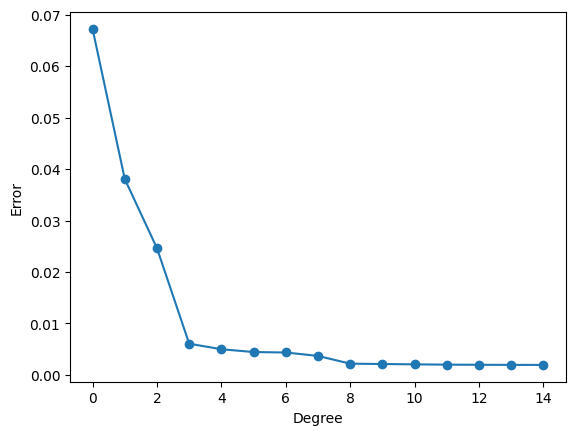

In [35]:
plt.plot(degrees, losses)
plt.scatter(degrees, losses)
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

*Approximately: it seems that the higher the degree, the lower the training error.*

**Now sample some *new* points from the ground truth function, similarly to how the training points where sampled.**

In [36]:
np.random.seed(43)
N = 20
new_points = np.random.uniform(1, 10, size=N)
#points = np.arange(1,10,0.5)
noise = np.random.randn(N)
new_labels = f(new_points) + 0.1 * noise

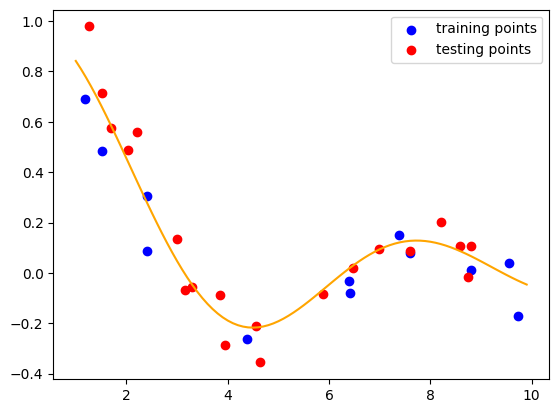

In [37]:
plt.plot(X_f,Y_f,color='orange')
plt.scatter(points, labels, c='blue', label='training points')
plt.scatter(new_points, new_labels, c='red', label='testing points')
plt.legend()
plt.show()

***Here I was supposed to ask you to plot the polynomials for the different degrees along with the new points, but it seems like I accidently deleted the question... Sorry.***

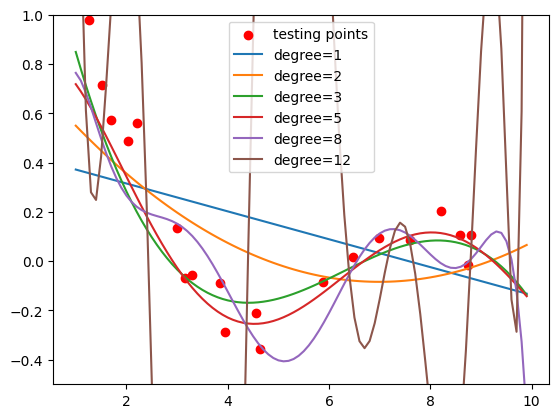

In [38]:
plotted_degrees = [1, 2, 3, 5, 8, 12]
plt.scatter(new_points, new_labels, c='red', label='testing points')
for degree in plotted_degrees:
    coefs = all_poly_coefs[degree]
    plt.plot(X_f, Polynomial(coefs)(X_f), label='degree={}'.format(degree))
plt.ylim([-0.5, 1])
plt.legend()
plt.show()

**Interpret this in term of overfitting, underfitting etc**

*We are clearly underfitting for degrees 1 and 2 and overfitting for degrees 8 and above.*

*We can confirm this by plotting the looking at the testing errors.*

In [39]:
test_losses = []
for degree in degrees:
    coefs = all_poly_coefs[degree]
    poly = Polynomial(coefs)
    predictions = poly(new_points)
    test_loss = ((new_labels - predictions) ** 2).mean()
    test_losses.append(test_loss)

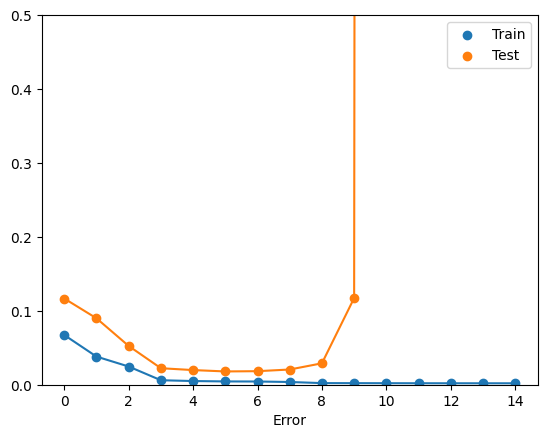

In [40]:
plt.plot(degrees, losses)
plt.scatter(degrees, losses, label='Train')
plt.plot(degrees, test_losses)
plt.scatter(degrees, test_losses, label='Test')
plt.ylim([0, 0.5])
plt.xlabel('Degree')
plt.xlabel('Error')
plt.legend()
plt.show()

*The testing loss decreases until degree 6, and the increases (and exploses) while the training loss continues to decrease, so we are clearly overfitting.*

# Linear regression

Now we will implement two ways to do linear regression. We will generate some data (area and age) for houses, and try to predict their price.

We will start by generating N training points and labels.

In [41]:
np.random.seed(42)
N = 50
house_area = np.random.uniform(50,300,size=N)
house_age = np.random.uniform(0,150,size=N)
noise = np.random.normal(10, 5,size=N)
house_price = 1.1 * house_area - 0.5 * house_age + noise # the price is assumed to be in k€

In [42]:
training_data = np.concatenate([house_age.reshape(-1,1), house_area.reshape(-1,1)], axis=1)

Let's visualize the relation between the target and each individual variable.

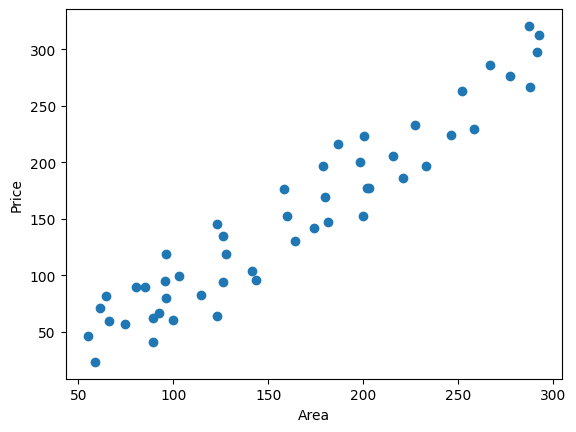

In [43]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

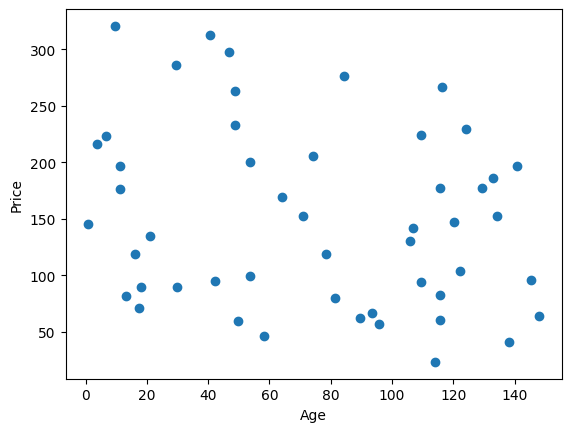

In [44]:
plt.scatter(house_age, house_price)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

**Are the generated data and ground truth function realistic?**

*Not so much: a house has a price close to 0, it seems unlikely that the age of the house affects the price in a linear way, and the price of a house depends on many other factors (location, quality of materials...)*

Now let's do a linear regression! We will assume there is no intercept, i.e. $f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}$ (there is no additional $w_0$ term)

Given the parameters $\mathbf{w} = (w_1,w_2)^\top$ and the training data $\mathbf{X}$,
predictions can be made with $\hat{\mathbf{y}} = \mathbf{Xw}$

In [45]:
w = np.array([2,2]) # as a start
X = training_data

In [46]:
predictions = X.dot(w)

**Implement a function which provides the mean square error
$J(\mathbf{w}) = \frac{1}{N}  \lVert \mathbf{y} - \mathbf{Xw} \rVert_2^2$
given the training data, labels and model parameters.**

In [47]:
def mse(data, labels, parameters):
    return np.power(data.dot(parameters) - labels, 2).mean()

**What is $\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$?**

*As seen in class the gradient of the loss function is $\frac{2}{N}\mathbf{X}^\top(\mathbf{Xw}-\mathbf{y})$ (I forgot the $\frac{1}{N}$ in the slides, but it does not change the general idea).*

**Implement gradient descent:
$\mathbf{w}_{(t)} = \mathbf{w}_{(t-1)} - \alpha \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$**

**Determine suitable values for the parameters $\mathbf{w}$ using gradient descent on the training set.**

**Print the training error at each step. Is the training error decreasing? If not, try different values of $\alpha$.**

In [48]:
def get_gradient(data, labels, parameters):
    N = data.shape[0]
    return 2 * data.T.dot(data.dot(parameters) - labels) / N

In [49]:
def gradient_descent(initial_parameters, data, labels, alpha=1e-5, n_iterations=100):
    parameters = initial_parameters
    for i in range(n_iterations):
        print('Iteration {}'.format(i))
        loss = mse(data, labels, parameters)
        print('MSE: {}'.format(loss))
        gradient = get_gradient(data, labels, parameters)
        #print(gradient)
        parameters = parameters - alpha * gradient
        #print(parameters)
    return parameters

In [50]:
estimated_w = gradient_descent(w, training_data, house_price)

Iteration 0
MSE: 121198.20360919274
Iteration 1
MSE: 16445.535800296173
Iteration 2
MSE: 7935.648935224733
Iteration 3
MSE: 6670.90230284324
Iteration 4
MSE: 6006.133716720558
Iteration 5
MSE: 5440.011887435881
Iteration 6
MSE: 4930.047788363026
Iteration 7
MSE: 4468.461620329404
Iteration 8
MSE: 4050.498336531169
Iteration 9
MSE: 3672.02292888319
Iteration 10
MSE: 3329.3037829234563
Iteration 11
MSE: 3018.9627761571383
Iteration 12
MSE: 2737.941002570764
Iteration 13
MSE: 2483.468549280347
Iteration 14
MSE: 2253.0371892285766
Iteration 15
MSE: 2044.375658248436
Iteration 16
MSE: 1855.427268145496
Iteration 17
MSE: 1684.3296347925934
Iteration 18
MSE: 1529.396321399368
Iteration 19
MSE: 1389.1002160202095
Iteration 20
MSE: 1262.0584794596289
Iteration 21
MSE: 1147.0189152129258
Iteration 22
MSE: 1042.847627096437
Iteration 23
MSE: 948.5178429138655
Iteration 24
MSE: 863.0997939983122
Iteration 25
MSE: 785.7515508769418
Iteration 26
MSE: 715.7107247293288
Iteration 27
MSE: 652.286952844

The training error should be much lower than at the start.

In [51]:
estimated_w

array([-0.43497573,  1.12208213])

*We will consider that this is close enough to the ground truth values (-0.5, 1.1)*

**Plot the fitted curve for each of the two parameters in the fitted $\mathbf{w}$.**

Example with the first parameter:

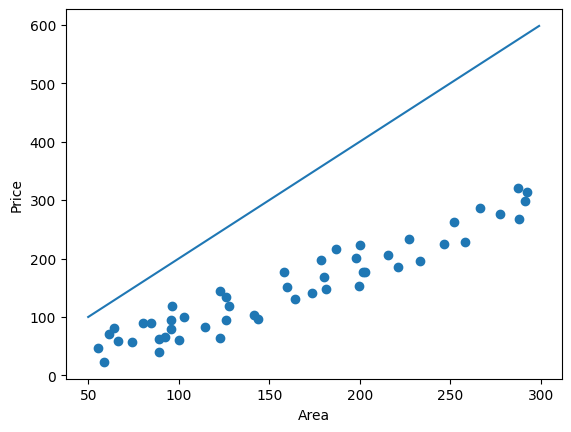

In [52]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')

area_range = np.arange(50,300,1)
predictions = w[0] * area_range
plt.plot(area_range, predictions)

plt.show()

For now, it's not looking good because we haven't trained the model. It should look better after your gradient descent.

*After gradient descent:*

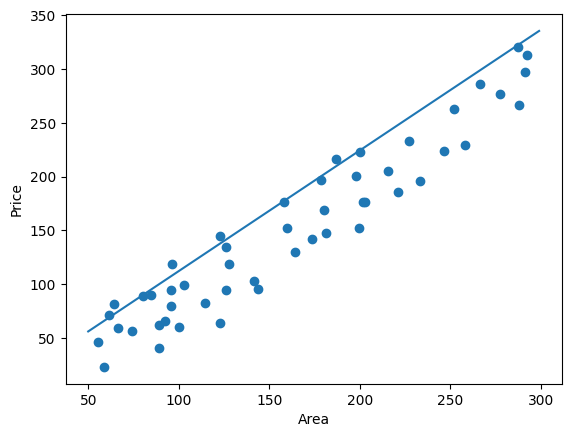

In [53]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')
area_range = np.arange(50,300,1)
predictions = estimated_w[1] * area_range
plt.plot(area_range, predictions)
plt.show()

*Or even better, we also take the second parameter into account when plotting the first one:*

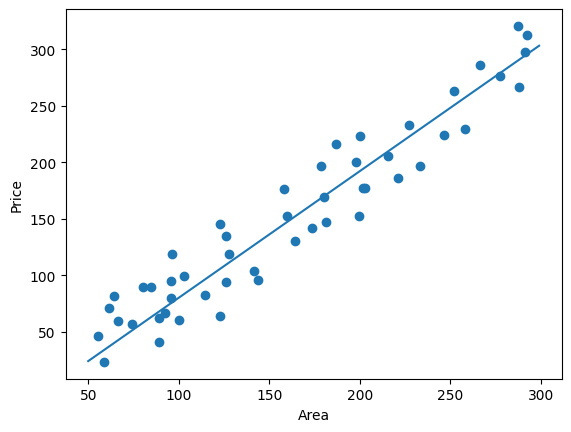

In [54]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')
area_range = np.arange(50,300,1)
predictions = estimated_w[1] * area_range + estimated_w[0] * house_age.mean()
plt.plot(area_range, predictions)
plt.show()

In [55]:
house_age.max()

148.03304049007758

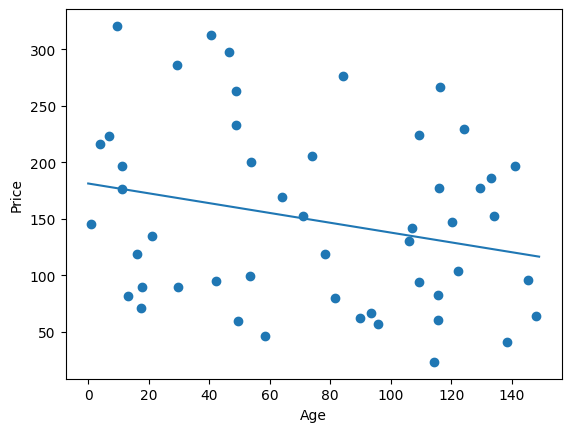

In [56]:
plt.scatter(house_age, house_price)
plt.xlabel('Age')
plt.ylabel('Price')
age_range = np.arange(0,150,1)
predictions = estimated_w[0] * age_range + estimated_w[1] * house_area.mean()
plt.plot(age_range, predictions)
plt.show()

**Now use the closed-form solution to obtain good values for the parameters $\mathbf{w}$ using the training set.**

In [57]:
closed_form_w = np.linalg.inv(training_data.T.dot(training_data)).dot(training_data.T).dot(house_price)

**Display the exact values of the parameters $\mathbf{w}$.
Are they the same as the one you obtained from gradient descent?
Are they the same as the ground truth values? Why?**

In [58]:
print('Ground truth: {}'.format([-0.5, 1.1]))
print('Estimated with gradient descent: {}'.format([estimated_w]))
print('Estimated with closed-form solution: {}'.format([closed_form_w]))

Ground truth: [-0.5, 1.1]
Estimated with gradient descent: [array([-0.43497573,  1.12208213])]
Estimated with closed-form solution: [array([-0.44730823,  1.12730327])]


*The estimated parameters with the two different methods are close to each other. There are a bit farther from the ground truth but still reasonably close. The difference between the estimated values and ground truth may be explained by the noise in the data.*

In practice, a machine learning engineer does not waste time implementing standard algorithms.
Scikit-learn provides an implementation of a linear regression, among many other learning algorithms.

*(Obviously, YOU are not wasting time, because you are learning. Implementing a linear regression is something everyone should do at least once in their life).*

**Look at the documentation from scikit-learn, and train a linear regression on our data using the provided implementation.
Look at the coefficients $\mathbf{w}$. Is it the same as the one you found? Is it the same as the ground truth?**

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(training_data, house_price)
linreg.coef_

array([-0.44730823,  1.12730327])

*Exactly the same as our closed-form solution.*